<a href="https://colab.research.google.com/github/ErnestWang31/Road-Sign-Classification/blob/main/RoadSignClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), 117.80 MiB | 4.90 MiB/s, done.
Updating files: 100% (4/4), done.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential #specify a neural network, precisely, sequential: from input to output, passing through a series of neural layers, one after the other
from keras.layers import Dense #feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten #dropout fixes over fitting, flatten flattens feature shape to output as 1d arrray
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import pickle
import pandas as pd
import random

In [4]:
np.random.seed(0)

In [5]:
with open ('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open ('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open ('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [7]:
assert(X_train.shape[0] == y_train.shape[0]), "num of images no equal to labels"
assert(X_val.shape[0] == y_val.shape[0]), "num of images no equal to labels"
assert(X_test.shape[0] == y_test.shape[0]), "num of images no equal to labels"

assert(X_train.shape[1:] == (32, 32, 3)), "dimensions not correct"
assert(X_val.shape[1:] == (32, 32, 3)), "dimensions not correct"
assert(X_val.shape[1:] == (32, 32, 3)),"dimensions not correct"

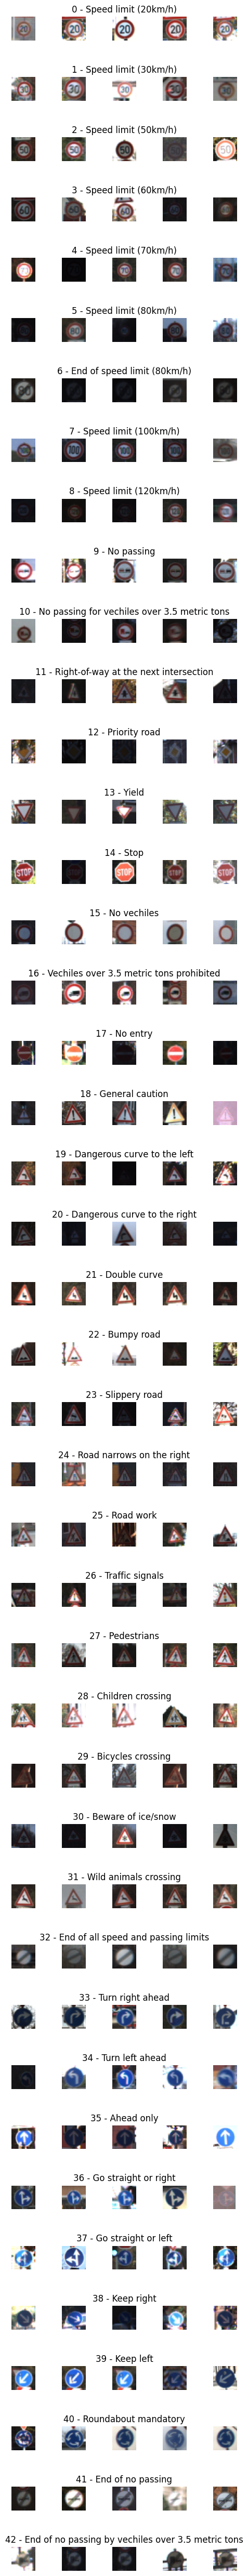

In [8]:
data = pd.read_csv("german-traffic-signs/signnames.csv")
num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

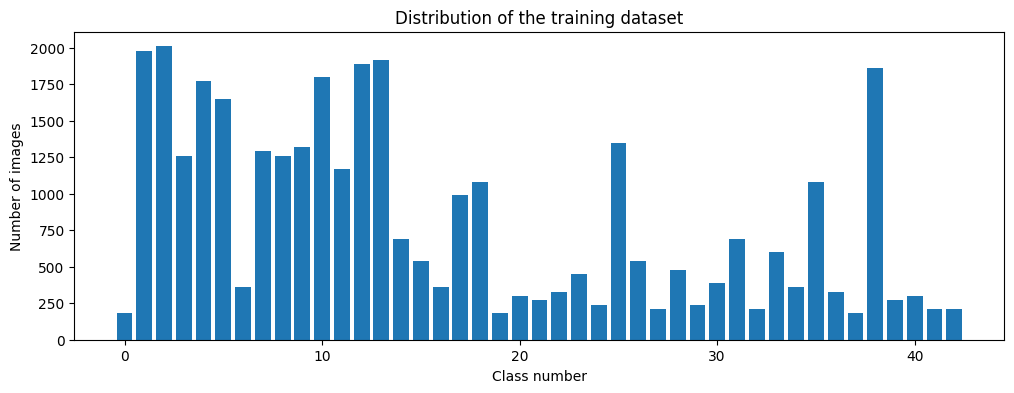

In [9]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
36


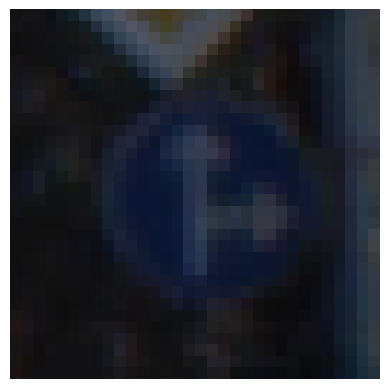

In [10]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


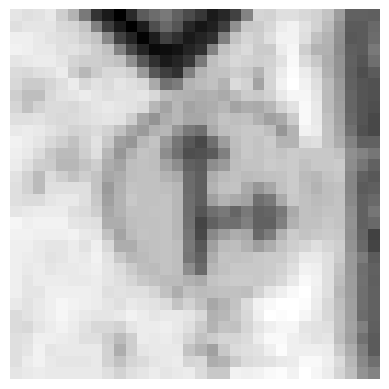

In [11]:
def grayscale(img):
  img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = cv2.bitwise_not(grayscale(X_train[1000]))
plt.imshow(img, cmap=plt.get_cmap("gray"))
plt.axis('off')
print(img.shape)

(32, 32)


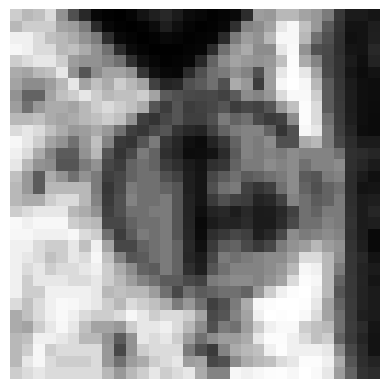

In [12]:
def equalize (img):
  img = cv2.equalizeHist(img)
  return img

img = equalize(img)

plt.imshow(img, cmap=plt.get_cmap("gray"))
plt.axis('off')
print(img.shape)

In [13]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


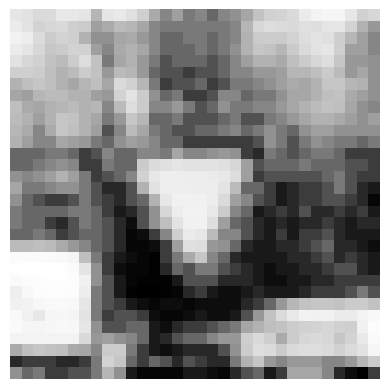

In [14]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)], cmap=plt.get_cmap("gray"))
plt.axis("off")
print(X_train.shape)

In [15]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [16]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range = 0.1,
                   height_shift_range = 0.1,
                   zoom_range = 0.2,
                   shear_range = 0.1,
                   rotation_range = 10)
datagen.fit(X_train)

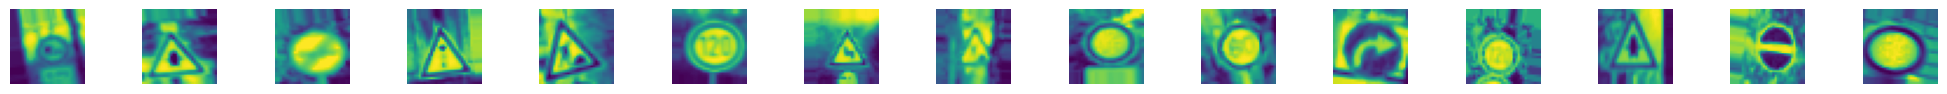

In [17]:
batches = datagen.flow(X_train, y_train, batch_size = 20)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range (15):
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')

In [18]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [19]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

architecture of model



```
# This is formatted as code
```



In [20]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape =(32, 32, 1), activation = 'relu'))
  model.add(Conv2D(60, (5,5), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(30, (3, 3), activation = 'relu'))
  model.add(Conv2D(30, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(.5))


  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(.5))
  model.add(Dense(num_classes, activation = 'softmax'))

  #compile model
  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return model

In [21]:
model=modified_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [32]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 50), steps_per_epoch = X_train.shape[0]/50, epochs = 10, validation_data = (X_val, y_val), shuffle = 1)

Epoch 1/10


<ipython-input-32-03fd96b564f0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 50), steps_per_epoch = X_train.shape[0]/50, epochs = 10, validation_data = (X_val, y_val), shuffle = 1)


695/695 [==============================] - 23s 33ms/step - loss: 0.6231 - accuracy: 0.8036 - val_loss: 0.1549 - val_accuracy: 0.9583
Epoch 2/10
695/695 [==============================] - 16s 23ms/step - loss: 0.4824 - accuracy: 0.8488 - val_loss: 0.0962 - val_accuracy: 0.9751
Epoch 3/10
695/695 [==============================] - 16s 22ms/step - loss: 0.4111 - accuracy: 0.8719 - val_loss: 0.0767 - val_accuracy: 0.9785
Epoch 4/10
695/695 [==============================] - 15s 22ms/step - loss: 0.3539 - accuracy: 0.8897 - val_loss: 0.0700 - val_accuracy: 0.9805
Epoch 5/10
695/695 [==============================] - 16s 23ms/step - loss: 0.3152 - accuracy: 0.9013 - val_loss: 0.0583 - val_accuracy: 0.9855
Epoch 6/10
695/695 [==============================] - 16s 23ms/step - loss: 0.2925 - accuracy: 0.9078 - val_loss: 0.0585 - val_accuracy: 0.9837
Epoch 7/10
695/695 [==============================] - 18s 26ms/step - loss: 0.2589 - accuracy: 0.9182 - val_loss: 0.0917 - val_accuracy: 0.9703
Epo

Text(0.5, 0, 'epoch')

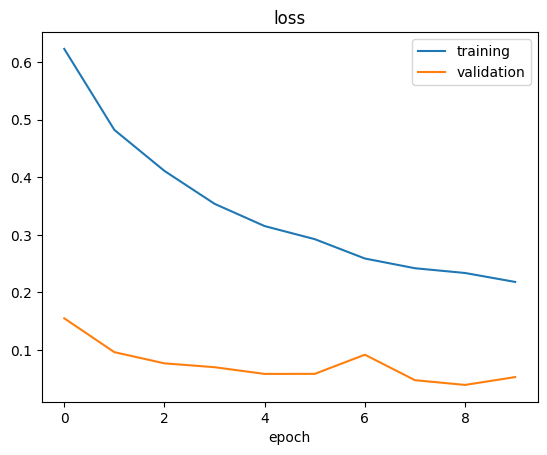

In [33]:
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

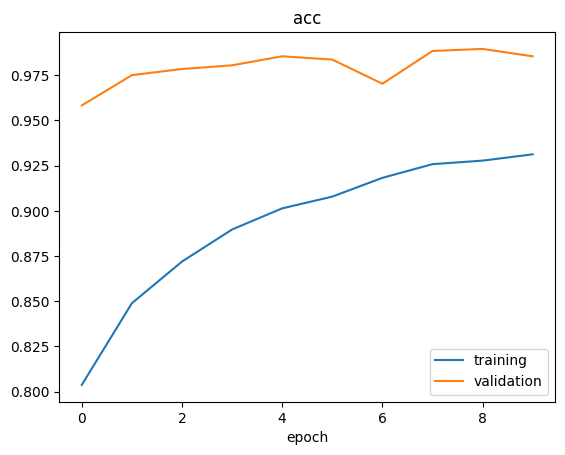

In [34]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('acc')
plt.xlabel('epoch')

In [35]:
score = model.evaluate(X_test, y_test, verbose = 0)

print('Test, Score', score[0])
print('Test, acc', score[1])

Test, Score 0.1468101143836975
Test, acc 0.9577988982200623


TESTING

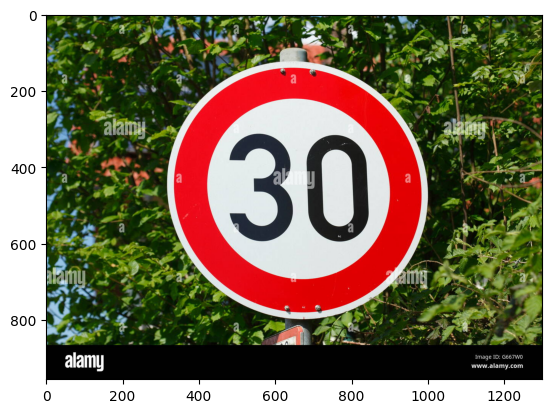

In [36]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


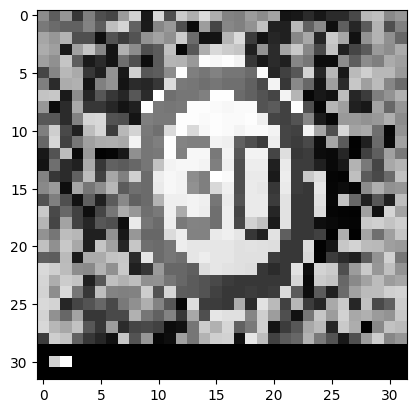

In [37]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)



In [38]:
#Reshape reshape

img = img.reshape(1, 32, 32, 1)

#Test image
pred = np.argmax(model.predict(img), axis =-1)
print("Predicted sign: " + str(pred))

1/1 [==============================] - 0s 30ms/step
Predicted sign: [1]
